**Task-1 Prediction using Supervised ML (Level - Beginner)**

 Predict the percentage of marks of an student based on the number of study hours.
 What will be predicted score if a student studies for 9.25 hrs/ day?

 SRILAKSHMI KANAGALA

CODE:QQCEVECEC6CW

email id: srilu100161998@gmail.com


In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/drive/My Drive/GRIPfoundation/Studentmarks/Studentmarks.csv')
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [ ]:
#get the input data and output data
#X=X.reshape(len(X),1)
#y=y.reshape(len(y),1)
#dividing the data to training data and test data
from sklearn.model_selection import train_test_split
X=data['Hours'].values
y=data['Scores'].values  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
#from scratch coding of linear regression
def linearRegression(X_data,y_data):
  #y=m*x+c
  #m=sum(xi-xmean)*(yi-ymean)/sum(xi-xmean)^2
  #c=ymean-xmean*m
  n=len(X_data)
  xmean=np.mean(X_data)
  ymean=np.mean(y_data)
  num=0
  den=0
  for i in range(0,n):
    num+=(X_data[i]-xmean)*(y_data[i]-ymean)
    den+=(X_data[i]-xmean)**2
  m=num/den
  c=ymean-(xmean*m)
  return m,c

In [ ]:
m,c=linearRegression(X_train,y_train)
print(m,c)

9.788566686749043 2.3708153823418954


In [ ]:
def meansquare_rootmeansquare(X_data,y_data,m,c):
  #to check how close the data is to the actual data
  #rootmeansquare method-sqrt((ypred-y)^2/n)
  #meansquare method=((ypred-y)^2/n)
  #to check how close the data is to the fitted regression line r2 score is calculated
  #SSR=(y-ypred)^2 SST=(y-ymean)^2 score=1-(SSR/SST)
  rmse=0
  mse=0
  sum=0
  n=len(X_data)
  y_pred=[]
  for i in range(0,n):
    y=m*(X_data[i])+c
    y_pred.append(y)
    sum+=(y-y_data[i])**2
  rmse=(np.sqrt(sum/n))
  mse=(sum/n)
  ssr1=0
  sst1=0
  for i in range(0,n):
    ssr1+=(y_data[i]-y_pred[i])**2
    sst1+=(y_data[i]-np.mean(y_data))**2
  r2score=1-(ssr1/sst1)
  return y_pred,rmse,mse,r2score
y_pred,rmse,mse,r2score=meansquare_rootmeansquare(X_test,y_test,m,c)
print(rmse,mse,r2score)
print(y_pred)

4.7921912746363144 22.96509721270042 0.9568211104435258
[17.05366541246546, 33.69422877993883, 74.80620886428483, 26.842232099214502, 60.12335883416125, 39.56736879198826, 20.969092087165077, 78.72163553898443]


In [ ]:
#predicting scores for the given number of hours 9.25 hrs per days
y_score_student=m*(9.25)+c
print(y_score_student)

92.91505723477053


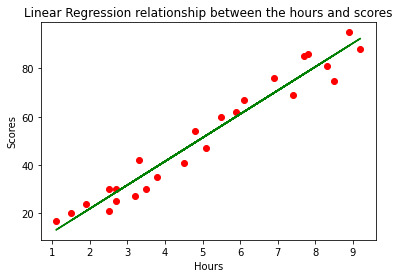

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y,c='red')
line=m*(X)+c
plt.plot(X,line,c='green')
plt.title('Linear Regression relationship between the hours and scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [ ]:
#using the sklearn linear model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
X_pre=data.iloc[:,[0]].values
y_pre=data.iloc[:,[1]].values
X_train_pre,X_test_pre,y_train_pre,y_test_pre=train_test_split(X_pre,y_pre,test_size=0.3,random_state=0)
reg.fit(X_train_pre,y_train_pre)
y_prediction=reg.predict(X_test_pre)
print(y_prediction)

[[17.05366541]
 [33.69422878]
 [74.80620886]
 [26.8422321 ]
 [60.12335883]
 [39.56736879]
 [20.96909209]
 [78.72163554]]


In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print(metrics.mean_absolute_error(y_test_pre, y_prediction))
print(r2_score(y_test_pre,y_prediction))

4.419727808027651
0.9568211104435257


In [ ]:
reg.coef_

array([[9.78856669]])

In [ ]:
reg.intercept_

array([2.37081538])

In [ ]:
y_score=reg.coef_[0][0]*(9.25)+reg.intercept_[0]
print(y_score)

92.91505723477056


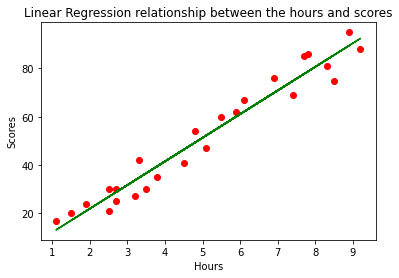

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_pre,y,c='red')
line=reg.coef_[0][0]*(X_pre)+reg.intercept_[0]
plt.plot(X_pre,line,c='green')
plt.title('Linear Regression relationship between the hours and scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [ ]:
#visualising the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

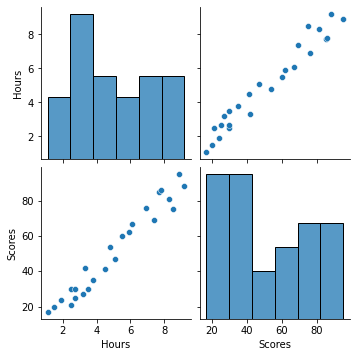

In [ ]:
import seaborn as sns
sns.pairplot(data)

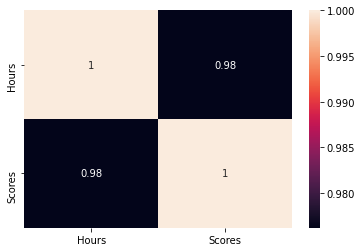

In [ ]:
sns.heatmap(data.corr(),annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


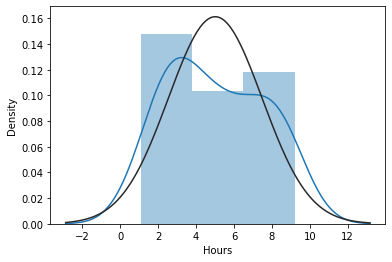

In [ ]:
from scipy.stats import norm
from scipy import stats
sns.distplot(data['Hours'],fit=norm)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


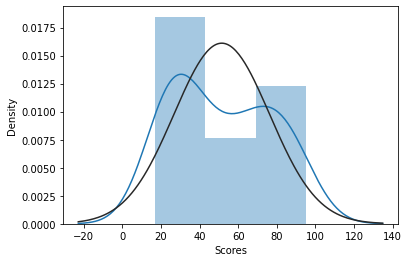

In [ ]:
sns.distplot(data['Scores'],fit=norm)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


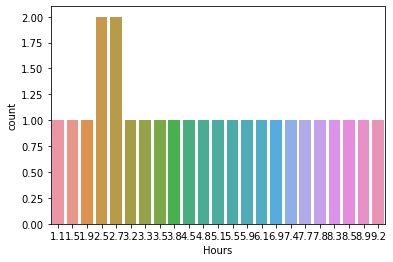

In [ ]:
sns.countplot(data['Hours'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


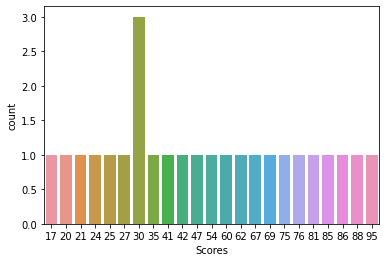

In [ ]:
sns.countplot(data['Scores'])

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([1.1, 1.5, 1.9, 2.5, 2.5, 2.7, 2.7, 3.2, 3.3, 3.5, 3.8, 4.5, 4.8,
         5.1, 5.5, 5.9, 6.1, 6.9, 7.4, 7.7, 7.8, 8.3, 8.5, 8.9, 9.2])),
 (2.583577905087343, 5.012, 0.9789402086868313))

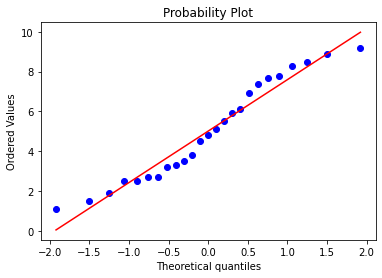

In [ ]:
stats.probplot(data['Hours'],plot=plt,dist='norm')

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([17, 20, 21, 24, 25, 27, 30, 30, 30, 35, 41, 42, 47, 54, 60, 62, 67,
         69, 75, 76, 81, 85, 86, 88, 95])),
 (25.58038152298867, 51.47999999999999, 0.9678851140595))

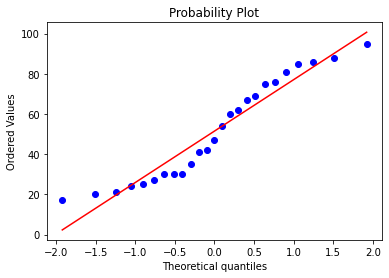

In [ ]:
stats.probplot(data['Scores'],plot=plt,dist='norm')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


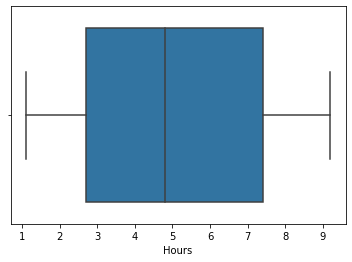

In [ ]:
sns.boxplot(data['Hours'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


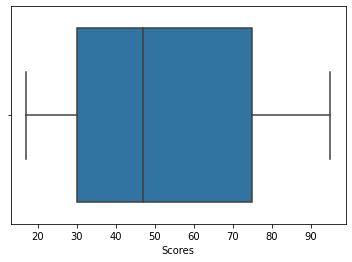

In [ ]:
sns.boxplot(data['Scores'])